In [1]:
""""
In this code we will make a linear regression model to predict sales.
To do that we need to a dataset and of course math :)
"""

'"\nIn this code we will make a linear regression model to predict sales.\nTo do that we need to a dataset and of course math :)\n'

In [2]:
# Importing libraries
import numpy as np
import matplotlib.pyplot as plt

In [3]:
# We will create a small dataset to get its logic via using np 2D arrays.
# First column for Advertising Spending (we call it as AdS) (X)
# Second column for Sales (Y)
sale_dataset = np.array([[1500, 400],
                         [1700, 500],
                         [2000, 550],
                         [2500, 570],
                         [3000, 700]])
x_values = sale_dataset[:,0]
y_values =sale_dataset[:,1]
print("X values:", x_values)
print("Y values:", y_values)

X values: [1500 1700 2000 2500 3000]
Y values: [400 500 550 570 700]


You don't need to know how to plot data for now, but I will use for visualize it to better understanding. You can just run the code block and pass the code part and just look output.

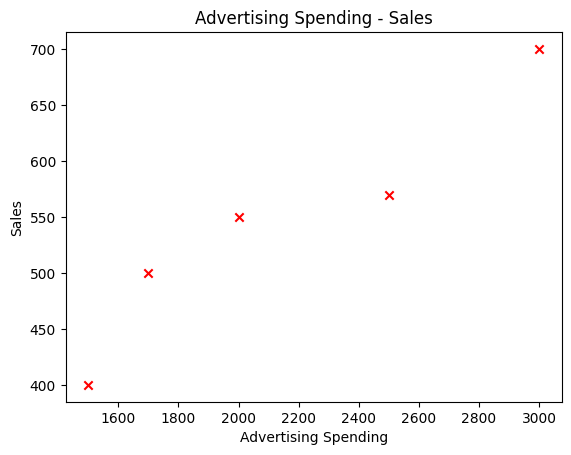

In [4]:
plt.scatter(x_values, y_values, marker='x', c="r")
plt.title("Advertising Spending - Sales")
plt.xlabel("Advertising Spending")
plt.ylabel("Sales")
plt.show()

As we can see there are some data points and our purpose is finding the best fitting line for these points.

To doing that first we should know some mathametical functions.
As we know if we mention about a linear regression, we need a best fitting line for data points. So we need a best fitting linear function. As we know linear functions have a slope and a constant to define. Thus, if we generalise, it becomes: f_wb(x) = wx+b

![Alt text](images/image-1.png)

Next we need to know cost function, it is a squared error function so it computes difference between real data points and our linear functions values and take their square and sum all of them. This values become our cost value.

![Alt text](images/image-2.png)

m -> number of data points

Visualization of cost function:
![Alt text](images/image-3.png)
As we can see it looks like a bowl and we try to find the lowest point of that bowl, so minimum cost.

![Alt text](images/image-5.png)
This is another illustration of cost function.

Best fitting line also means function that minimize the cost function. Thus, if we find the minimum value of cost function, we can say that we found optimum parameters(w,b), so if we rewrite our f function it will be best fitting line.

Now we know the formulas, and lets implement it.

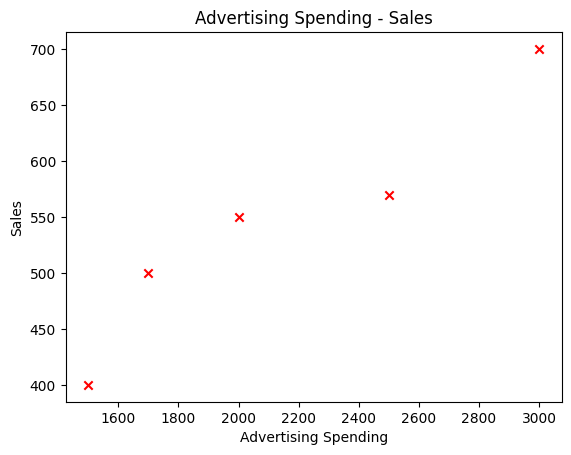

In [5]:
# As a reminder our dataset looks like this
plt.scatter(x_values, y_values, marker='x', c="r")
plt.title("Advertising Spending - Sales")
plt.xlabel("Advertising Spending")
plt.ylabel("Sales")
plt.show()

Defining our linear function

In [6]:
def f_wb (x, w, b):
    """
    Args:
    x -> scalar
    w -> scalar
    b -> scalar
    return:
    one scalar
    """
    return x * w + b

Implementation of the cost function. Normally we will just need to find the total cost with cost function, but to visualize and get the exact numbers for each data point, we will return each points cost with this function.

In [7]:
def cost_function_vis(x_values, y_values, w, b):
    """
    Args:
    x_values -> vector
    w -> scalar
    b -> scalar
    return:
    cost_values -> vector
    """
    m = x_values.size
    
    cost_values = np.zeros(m) # Create an 1D array with m elements that are zero.
    for i in range(m):
        cost = f_wb(x_values[i],w,b) - y_values[i]
        cost = cost **2
        cost_values[i] = cost
    return cost_values

Now lets give some values to paramaters manually and see how cost function works. (You can pass the plotting code and just run and investigate the output graph)

In [8]:
def sketch_linear_function(x_values, y_values, w, b, r):
    x_start = 0
    x_end = r
    y_start = x_start * w + b
    y_end = x_end * w + b

    # Sketch data poitns
    plt.scatter(x_values, y_values, marker='x', c="r")

    # Sketch linear function
    plt.plot([x_start,x_end], [y_start, y_end], label=f"f={w}x+{b}")

    # Calculating costs
    cost_values = cost_function_vis(x_values, y_values, w, b)
    print("Total Cost:", cost_values.sum())

    # Sketching dotted lines from function to each data point to improve visualization.
    for i in range(x_values.size):
        plt.plot([x_values[i], x_values[i]], [x_values[i] * w + b, y_values[i]], linestyle = 'dotted', c="k")
        plt.text(x_values[i]-50, y_values[i]+20, round(cost_values[i],3) , fontsize=8, color='red')

    plt.title("Advertising Spending - Sales")
    plt.xlabel("Advertising Spending")
    plt.ylabel("Sales")
    plt.legend()
    plt.show()


First lets say that w = 0.1; b = 300

Total Cost: 16300.0


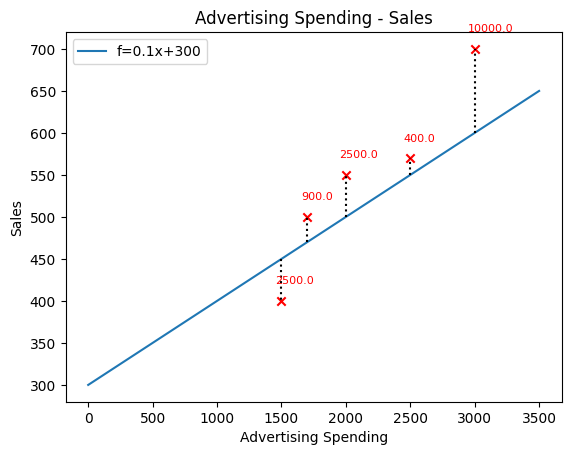

In [9]:
sketch_linear_function(x_values, y_values,0.1,300,3500)

As we can see we are so far from optimum lets try some more manuel values and then learn how to find optimum one.

Say w = 0.25; b = 0

Total Cost: 14275.0


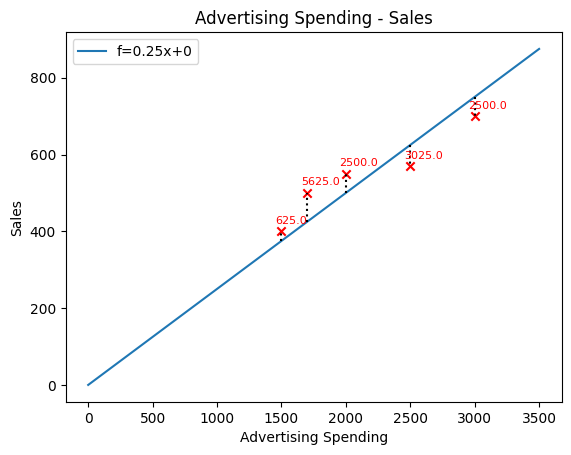

In [10]:
sketch_linear_function(x_values, y_values,0.25,0,3500)

Finally say w = 0.22; b = 80

Total Cost: 8316.0


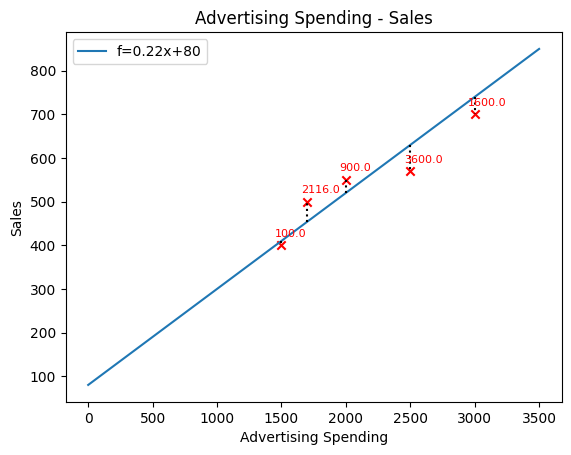

In [11]:
sketch_linear_function(x_values, y_values,0.22,80,3500)

You can also change the values and try another parameters to see how it works.
Now as you can notice it is really hard to find optimum values by trying them manually. To do that we have an another mathematical formula called as Gradient Descent.

Before dive into the gradient descent lets make our dataset richer.

In [12]:
sale_dataset = np.array([[10, 25],
                        [15, 27],
                        [20, 32],
                        [25, 40],
                        [30, 45],
                        [35, 50],
                        [40, 60],
                        [45, 63],
                        [50, 64],
                        [55, 66],
                        [60, 72],
                        [65, 77],
                        [70, 80],
                        [75, 81],
                        [80, 91],
                        [85, 100],
                        [90, 105],
                        [95, 107],
                        [100, 114],
                        [105, 113],
                        [110, 118],
                        [115, 125],
                        [120, 140],
                        [125, 145],
                        [130, 152],
                        [135, 158],
                        [140, 154],
                        [145, 160],
                        [150, 175],
                        [155, 190]
                         ])

##### New Dataset graph

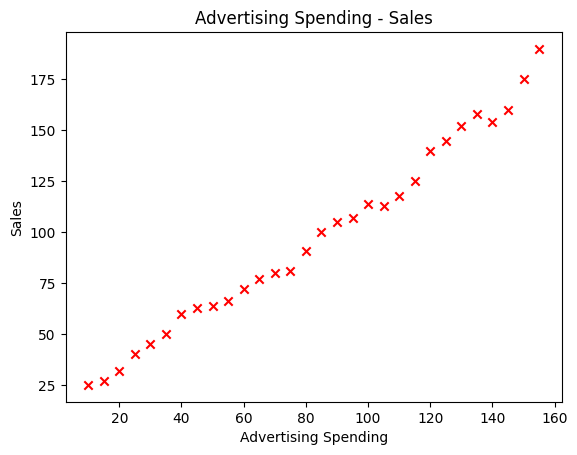

In [13]:
x_values = sale_dataset[:,0]
y_values = sale_dataset[:,1]
plt.scatter(x_values, y_values, marker='x', c="r")
plt.title("Advertising Spending - Sales")
plt.xlabel("Advertising Spending")
plt.ylabel("Sales")
plt.show()

### Gradient Descent


The question is, how can we find optimum values? On that point, Gradient Descent runs to our help. Before dive into its mathematical definition, lets look at its philosophy. 
Lets look another cost function graph to get its logic.

![Alt text](images/image-7.png)

If we think of the graph as mountains and valleys, when we started with a random value, say the top of the mountain, then take a baby steps to find the valley. Also you can notice that there are more then one valley so if we start from a little bit different position we will go to another valley. These valleys called as local minima. 

Now lets look its implementation with math.

![Alt text](images/image-6.png)

⍺ → learning rate

Learning rate represents how far we go on each step. It shouldn't be neither so big or so small. We will see its reasons below.

#### Now lets implement it and try to find optimum parameters

As I before mention we use cost function to get total cost instead of each data points costs for a function so we overwrite the cost function.

In [14]:
def cost_function(x_values, y_values, w, b):
    """
    Args:
    x_values -> vector
    w -> scalar
    b -> scalar
    return:
    total_cost -> scalar
    """
    m = x_values.size
    
    total_cost = 0

    for i in range(m):
        cost = f_wb(x_values[i],w,b) - y_values[i]
        cost = cost **2
        total_cost += cost
    return total_cost

In [15]:
def gradient_compute (x, y, w, b):
    """
    Computes the gradient for linear regression 
    Args:
      x -> ndarray
      y -> ndarray
      w,b -> (scalar)  
    Returns
      dj_dw (scalar)
      dj_db (scalar) 
     """
    
    m = x.size

    dj_dw = 0
    dj_db = 0

    for i in range(m):
        dj_dw += (f_wb(x[i], w, b) - y[i]) * x[i]
        dj_db += f_wb(x[i], w, b) - y[i]
    
    dj_dw /= m
    dj_db /= m
    return dj_dw, dj_db


Normally we don't need to return cost and parameter history, but it helps us to understand it.

In [16]:
def gradient_descent (x, y, w, b, num_iters= 5000, alpha=0.1):
    """
    Performs gradient descent to fit w,b. Updates w,b by taking 
    num_iters gradient steps with learning rate alpha
    
    Args:
      x -> ndarray 
      y -> ndarray 
      w,b -> (scalar)
      num_iters -> int
      alpha -> float
      
    Returns:
      w (scalar): Updated value of parameter after running gradient descent
      b (scalar): Updated value of parameter after running gradient descent
      j_history (List): History of cost values
      p_history (list): History of parameters [w,b] 
      """
    
    j_history = []
    p_history = []

    for i in range(num_iters):
        # Calculate gradient
        dj_dw, dj_db = gradient_compute(x, y, w, b)

        w -= alpha * dj_dw
        b -= alpha * dj_db

        j_history.append(cost_function(x, y, w, b))
        p_history.append([w,b])

    return w, b, j_history, p_history

Lets apply the gradient descent. (As I said alpha shouldn't be so big or so small but it depends to dataset and normally we should rescale datasets to make them more useful. However, I prefer to tell more about it in next article.)

In [17]:
init_w = 0 # Genrally we start from zero
init_b = 0 # Genrally we start from zero
iterations = 100000
alp = 0.00000001
final_w, final_b, j_hist, p_hist = gradient_descent(x_values, y_values, init_w, init_b, iterations, alp)

for i in range(0,100000,10000):
    print(f"Iteration: {i} ; Cost: {j_hist[i]} ; Parameters: w = {p_hist[i][0]} , b = {p_hist[i][1]}")
print(f"Gredient descent (final values):  w = {final_w} ; b = {final_b} ")

Iteration: 0 ; Cost: 349340.6162997241 ; Parameters: w = 0.00010031666666666666 , b = 9.763333333333335e-07
Iteration: 10000 ; Cost: 62836.26823720528 ; Parameters: w = 0.6706221881235245 , b = 0.006602266552351705
Iteration: 20000 ; Cost: 12350.640586210944 ; Parameters: w = 0.9520902833986058 , b = 0.009505301125726303
Iteration: 30000 ; Cost: 3454.424344984849 ; Parameters: w = 1.0702427315114595 , b = 0.010855891900713994
Iteration: 40000 ; Cost: 1886.7756792862945 ; Parameters: w = 1.1198391027146721 , b = 0.011554800345419168
Iteration: 50000 ; Cost: 1610.5110684788353 ; Parameters: w = 1.1406572413336784 , b = 0.011980144990380888
Iteration: 60000 ; Cost: 1561.804267120829 ; Parameters: w = 1.1493949531411172 , b = 0.012290651123293883
Iteration: 70000 ; Cost: 1553.1959613412669 ; Parameters: w = 1.1530615852333352 , b = 0.012552947895951677
Iteration: 80000 ; Cost: 1551.6535064694872 ; Parameters: w = 1.1545994970667859 , b = 0.012795004663073236
Iteration: 90000 ; Cost: 1551.3

Graph with final values:

Total Cost: 1551.2781855933688


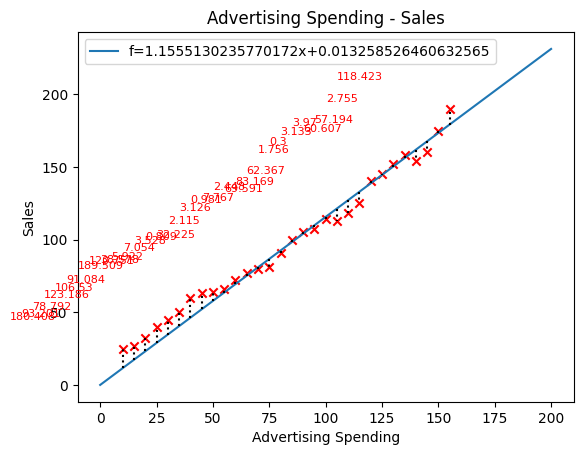

In [18]:
sketch_linear_function(x_values, y_values, final_w, final_b, 200)

We can observe the convacity from the above iteration-cost table. However, we can also sketck it to see concavity and find how many iterations it optimum for us.

In [19]:
def cost_iter_graph (x, y, w, b, num_iterations = 1000, alpha = 0.00000001): # x, y and w are vecors, b,num_iterations and alpha is scalers
    x_points = np.arange(num_iterations)
    y_points = np.zeros(num_iterations)
    
    for i in range(num_iterations):
        y_points[i] = cost_function(x, y, w, b)
        
        # Update w vector and b value
        # To do that we need to go one step further (alpha)
        dj_dw, dj_db = gradient_compute(x, y, w, b)
        w -= alpha * dj_dw 
        b -= alpha * dj_db 
    return x_points, y_points

0:   349401.0
500:  320479.90898636595
10k: 62846.9085929886
20k: 12352.515550777174
30k: 3454.7547394386775
40k: 1886.8339014235871
50k: 1610.5213304947779
60k: 1561.80607797137
70k: 1553.1962829920524
80k: 1553.1962829920524
90k: 1553.1962829920524
100k: 1551.2781904396738


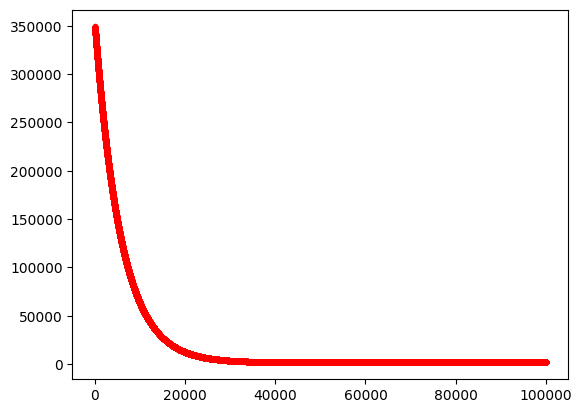

In [20]:
init_w = 0
init_b = 0
x_points, y_points = cost_iter_graph(x_values, y_values, init_w, init_b, num_iterations=100000, alpha=0.00000001)
# Some checkpoints with exact values
print("0:  ",y_points[0])
print("500: ",y_points[500])
print("10k:",y_points[10000])
print("20k:",y_points[20000])
print("30k:",y_points[30000])
print("40k:",y_points[40000])
print("50k:",y_points[50000])
print("60k:",y_points[60000])
print("70k:",y_points[70000])
print("80k:",y_points[70000])
print("90k:",y_points[70000])
print("100k:",y_points[99999])
plt.scatter(x_points, y_points, marker=".", c="r")

###### Thanks for sticking with me this far, please try other values and observe the results and try to get a better logic.

##### Author: Mehmet Gönenç